In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.describe())

             age        sex         cp    trestbps        chol        fbs  \
count  14.000000  14.000000  14.000000   14.000000   14.000000  14.000000   
mean   52.214286   0.642857   1.142857  135.357143  242.357143   0.142857   
std     7.816930   0.497245   0.949262   14.547573   48.154570   0.363137   
min    37.000000   0.000000   0.000000  120.000000  168.000000   0.000000   
25%    46.250000   0.000000   0.250000  122.500000  210.500000   0.000000   
50%    55.000000   1.000000   1.000000  134.000000  234.500000   0.000000   
75%    57.000000   1.000000   2.000000  140.000000  259.750000   0.000000   
max    63.000000   1.000000   3.000000  172.000000  354.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  14.000000   14.000000  14.000000  14.000000  14.000000  14.000000   
mean    0.714286  163.214286   0.142857   1.250000   1.357143   0.142857   
std     0.468807   12.084183   0.363137   0.951719   0.744946   0.363137   
mi

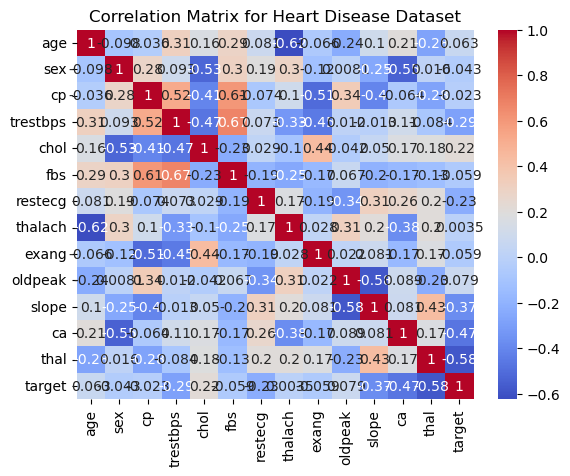

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Heart Disease Dataset")
plt.show()

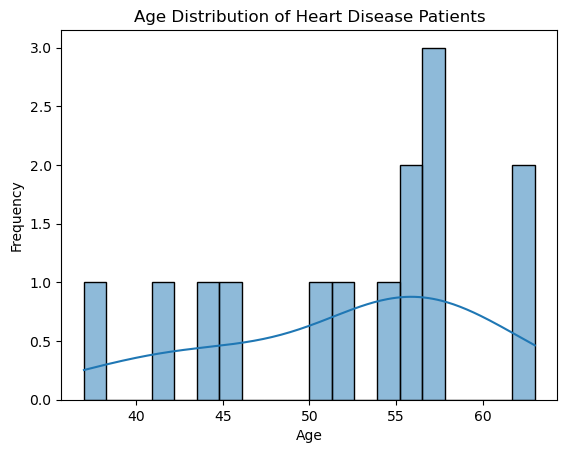

In [7]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Heart Disease Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [13]:
df = pd.read_csv('agriculture.csv')
print(df.head())

  crop_type  yield  fertilizer_use  rainfall region
0     Wheat    2.5              50       800  North
1      Rice    3.2              60      1200  South
2      Corn    4.1              55       900   East
3     Wheat    2.8              52       850  North
4      Rice    3.5              62      1300  South


In [15]:
print(df.describe())

          yield  fertilizer_use     rainfall
count  9.000000        9.000000     9.000000
mean   3.377778       56.111111   990.000000
std    0.632016        4.456581   200.312256
min    2.500000       50.000000   800.000000
25%    2.800000       52.000000   850.000000
50%    3.400000       56.000000   900.000000
75%    4.000000       60.000000  1200.000000
max    4.200000       62.000000  1300.000000


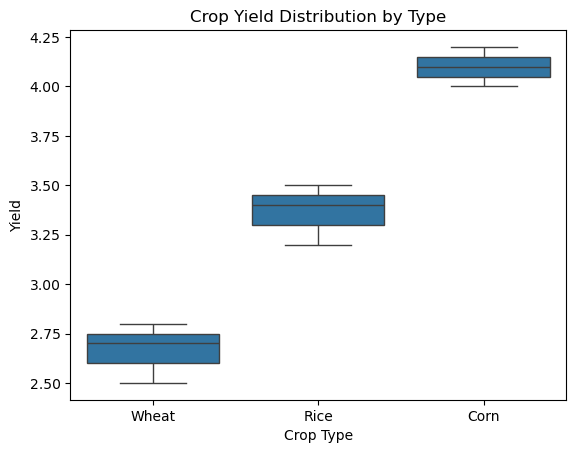

In [17]:
sns.boxplot(x='crop_type', y='yield', data=df)
plt.title("Crop Yield Distribution by Type")
plt.xlabel("Crop Type")
plt.ylabel("Yield")
plt.show()

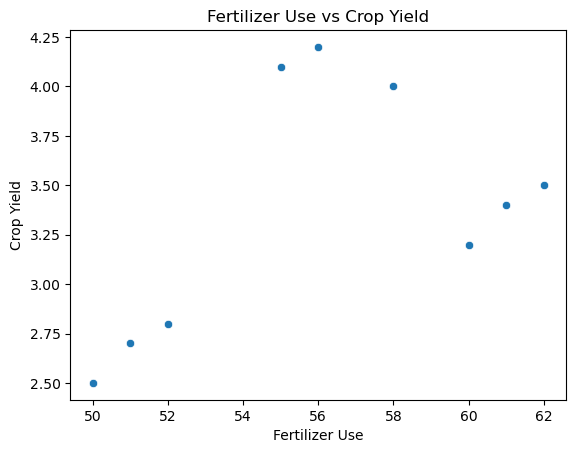

In [19]:
sns.scatterplot(x='fertilizer_use', y='yield', data=df)
plt.title("Fertilizer Use vs Crop Yield")
plt.xlabel("Fertilizer Use")
plt.ylabel("Crop Yield")

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['fertilizer_use', 'rainfall']]
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.07784903861650244


In [23]:
df = pd.read_csv('marketing_data.csv')
print(df.head())

   customer_id  annual_spending  frequency  campaign_success  churn
0            1             2500          5                 1      0
1            2             1200          3                 0      1
2            3             3500          8                 1      0
3            4             1900          4                 0      1
4            5             3000          6                 1      0


In [25]:
print(df.describe())

       customer_id  annual_spending  frequency  campaign_success      churn
count     10.00000         10.00000   10.00000         10.000000  10.000000
mean       5.50000       2370.00000    4.80000          0.600000   0.500000
std        3.02765       1155.71046    2.65832          0.516398   0.527046
min        1.00000        500.00000    1.00000          0.000000   0.000000
25%        3.25000       1750.00000    3.00000          0.000000   0.000000
50%        5.50000       2300.00000    4.50000          1.000000   0.500000
75%        7.75000       2950.00000    6.75000          1.000000   1.000000
max       10.00000       4500.00000    9.00000          1.000000   1.000000


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


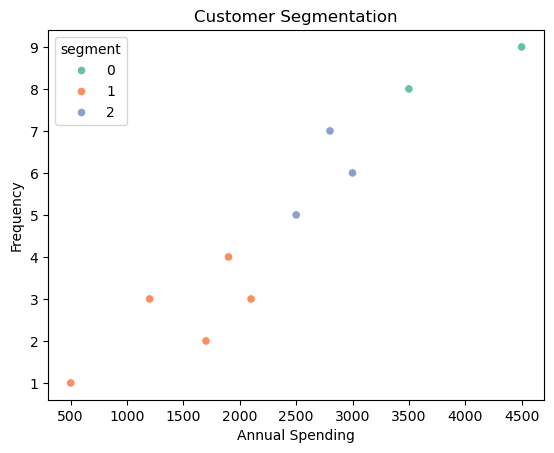

In [27]:
from sklearn.cluster import KMeans
X = df[['annual_spending', 'frequency']]
kmeans = KMeans(n_clusters=3)
df['segment'] = kmeans.fit_predict(X)
sns.scatterplot(x='annual_spending', y='frequency', hue='segment', data=df, palette='Set2')
plt.title("Customer Segmentation")
plt.xlabel("Annual Spending")
plt.ylabel("Frequency")
plt.show()

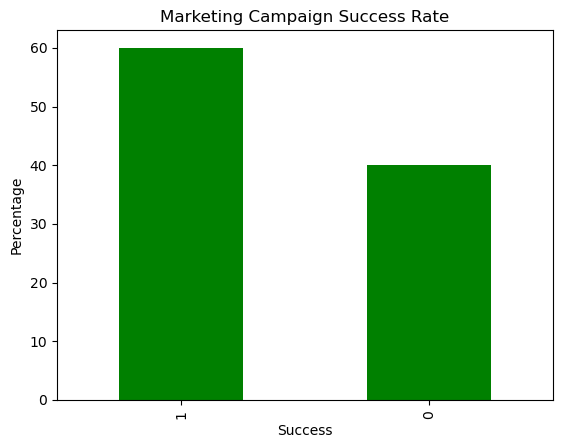

In [29]:
campaign_success_rate = df['campaign_success'].value_counts(normalize=True) * 100
campaign_success_rate.plot(kind='bar', color='green')
plt.title("Marketing Campaign Success Rate")
plt.xlabel("Success")
plt.ylabel("Percentage")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df.drop('churn', axis=1) 
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of Churn Prediction Model:", accuracy_score(y_test, y_pred))

Accuracy of Churn Prediction Model: 0.5
